# Classification of Liver Patients

Liver Patients are found using ILPD dataset

Importing Libraries

In [6]:
from copy import deepcopy
from sklearn.pipeline import Pipeline
from sklearn import svm
from sklearn.feature_selection import SelectFromModel
import numpy as np
import csv
import pandas as pd
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [7]:
def read_file(filename):
    df = pd.read_csv(filename, header = None)
    df[1], label1 = pd.factorize(df[1])
    return df

df = read_file('ILPD.csv')
print(df.head(5))


   0   1     2    3    4   5    6    7    8     9   10
0  65   0   0.7  0.1  187  16   18  6.8  3.3  0.90   1
1  62   1  10.9  5.5  699  64  100  7.5  3.2  0.74   1
2  62   1   7.3  4.1  490  60   68  7.0  3.3  0.89   1
3  58   1   1.0  0.4  182  14   20  6.8  3.4  1.00   1
4  72   1   3.9  2.0  195  27   59  7.3  2.4  0.40   1


In [8]:
def stratified_sampling(df, class1_p, class2_p):
    df_yes = df[df[10] == 1]
    df_no = df[df[10] == 2]
    df_yes[11] = np.random.uniform(0, 1, len(df_yes)) <= float(class1_p / 10)
    df_no[11] = np.random.uniform(0, 1, len(df_no)) <= float(class2_p/ 10)
    train = pd.DataFrame()
    test = pd.DataFrame()
    train1 = pd.DataFrame()
    train2 = pd.DataFrame()
    test1 = pd.DataFrame()
    test2 = pd.DataFrame()
    train1, test1 = df_yes[df_yes[11] == True], df_yes[df_yes[11] == False]
    train2, test2 = df_no[df_no[11] == True], df_no[df_no[11] == False]
    train = train1.append(train2)
    test = test1.append(test2)
    return train, test

train, test = stratified_sampling(df, 6, 9)
print(len(train), len(test))
    

404 175


In [9]:
def calc_metrics(pred, test):
    tp = tn = fp = fn = 0
    total = 0
    for x in test[10]:
        if x == pred[total]:
            if x == 1:
                tp = tp + 1
            else:
                tn = tn + 1

        else:
            if x == 1 and pred[total] == 2:
                fn = fn + 1
            if x == 2 and pred[total] == 1:
                fp = fp + 1
        total = total + 1

    accuracy = (tp + tn) / (tp + tn + fp + fn)
    sensitivity = tp / (tp + fn)
    specificity = tn / (fp + tn)
    precision = tp / (tp + fp)
    
    return accuracy, sensitivity, specificity, precision

In [10]:
def get_pred(train, test, kernel):
    features = df.columns[0:10]
    y = train[10]
    C = 1.0
    clf = svm.SVC(kernel = kernel, gamma = 0.7, C=C)
    clf.fit(train[features], y)
    pred = clf.predict(test[features])
    
    return pred

In [11]:
pred_rbf = get_pred(train, test, 'rbf')
acc, sens, spec, prec = calc_metrics(pred_rbf, test)
print(acc, sens, spec, prec)

0.8971428571428571 1.0 0.0 0.8971428571428571


In [38]:
def get_all_metrics(kernel):
    all_acc = list()
    all_sens = list()
    all_spec = list()
    all_prec = list()
    for i in range(4, 10):
        acc_i = list()
        sens_i = list()
        spec_i = list()
        prec_i = list()
        for j in range(4, 10):
            acc = list()
            sens = list()
            spec = list()
            prec = list()
            for k in range(20):
                train, test = stratified_sampling(df, i, j)
                pred = get_pred(train, test, kernel)
                a, s, sp, p = calc_metrics(pred, test)
                #print(acc, sens, spec, prec)
                acc.append(a)
                sens.append(s)
                spec.append(sp)
                prec.append(p)
            acc_i.append(np.mean(acc))
            sens_i.append(np.mean(sens))
            spec_i.append(np.mean(spec))
            prec_i.append(np.mean(prec))
        all_acc.append(acc_i)
        all_sens.append(sens_i)
        all_spec.append(spec_i)
        all_prec.append(prec_i)
    return all_acc, all_sens, all_spec, all_prec

a, s, sp, pr = get_all_metrics('rbf')
print(a)         

[[0.72360570772890243, 0.74863057586491455, 0.80287824393813312, 0.84445319098404048, 0.88802662582529734, 0.93975662183105813], [0.67990277736059579, 0.72267797114539123, 0.76485125103140172, 0.81010531335353364, 0.8640410201800508, 0.92696834328527178], [0.63340326757199628, 0.66821434984902195, 0.71820666645215725, 0.77123207035809127, 0.84632721942304501, 0.90857840597859385], [0.5614189741598401, 0.59706636080645203, 0.64902717731985915, 0.72902907148987262, 0.80321249483120938, 0.88143767281312202], [0.4566786985984847, 0.50121272003491346, 0.55981783429376875, 0.63908068190278822, 0.71726634029663539, 0.84279537627821033], [0.31518069268228216, 0.34334596135338813, 0.39463548142077193, 0.4749690822556033, 0.574714154513147, 0.70393432512305099]]


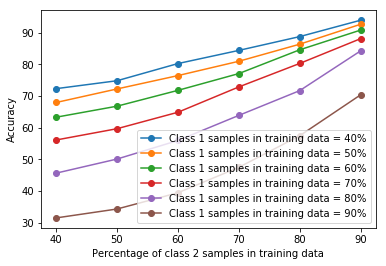

In [39]:
i = [40,50,60,70,80,90]
j = [40,50,60,70,80,90]

for k in range(0,6):
    for l in range(0,6):
        a[k][l] = a[k][l]*100

for k in range(0,6):
        plt.plot(i, a[k], 'o-', label="Class 1 samples in training data = " +str(i[k])+ "%")
plt.ylabel("Accuracy")
plt.xlabel("Percentage of class 2 samples in training data")
plt.legend()
plt.show()